<a href="https://colab.research.google.com/github/boqchen/Mathematical-Foundations-of-Computer-Graphics-and-Vision---SS21/blob/main/MCGV_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MATHEMATICAL FOUNDATIONS OF COMPUTER GRAPHICS AND VISION**

EXERCISE 2 - GLOBAL OPTIMIZATION

Boqi Chen (20-953-048)

**A. Derivation of the problem formulation in the canonical form of Linear Programming**

The general consensus set maximization can be mathematically formulated as: \begin{equation}
\begin{split}
\max_{\Theta, S_{I}} &\quad \text{card}(S_{I}) \\
\text{s.t.} 	&\quad f(\Theta,q_i)\leq\delta, \ \forall i \in S_I \subseteq S
\end{split}
\end{equation}

In our context of 2D translation with correspondences between two images, we have:
$$f_x(\Theta,p_i,p_i')=\vert x_i+T_x-x_i'\vert$$
$$f_y(\Theta,p_i,p_i')=\vert y_i+T_y-y_i'\vert$$
A correspondence $(p_i, p_i')$ is considered inlier if the $x$ and $y$ residuals are below the inlier threshold:
$$\vert x_i+T_x-x_i'\vert\leq\delta$$ and $$\vert y_i+T_y-y_i'\vert\leq\delta$$
Thus, Our consensus set maximization problem can now be formulated as:
\begin{equation}
\begin{split}
\max_{\Theta, S_{I}} &\quad \text{card}(S_{I}) \\
\text{s.t.} 	&\quad \vert x_i+T_x-x_i'\vert\leq\delta, \ \forall i \in S_I \subseteq S \\&\quad \vert y_i+T_y-y_i'\vert\leq\delta, \ \forall i \in S_I \subseteq S
\end{split}
\end{equation}

We can reformulate and relax the optimization problem with $z$ values as:
\begin{equation}
\begin{split}
\max_{\Theta, z} &\quad \sum_{i=1}^{N}z_i \\
\text{s.t.} 	&\quad z_i\vert x_i+T_x-x_i'\vert\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad z_i\vert y_i+T_y-y_i'\vert\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad 0\leq z_i\leq 1, \ \forall i \in S_I \subseteq S \\&\quad \underline{T_{x}} \leq T_{x} \leq \overline{T_{x}}, \quad \forall i = 1 \dots N \\&\quad \underline{T_{y}} \leq T_{y} \leq \overline{T_{y}}, \quad \forall i = 1 \dots N 
\end{split}
\end{equation}
This is equivalent to:
\begin{equation}
\begin{split}
\max_{\Theta, z} &\quad \sum_{i=1}^{N}z_i \\
\text{s.t.} 	&\quad -z_i\delta\leq z_i(x_i+T_x-x_i')\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad -z_i\delta\leq z_i(y_i+T_y-y_i')\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad 0\leq z_i\leq 1, \ \forall i \in S_I \subseteq S \\&\quad \underline{T_{x}} \leq T_{x} \leq \overline{T_{x}}, \quad \forall i = 1 \dots N \\&\quad \underline{T_{y}} \leq T_{y} \leq \overline{T_{y}}, \quad \forall i = 1 \dots N 
\end{split}
\end{equation}
To get rid of the bilinear terms which are introduced by multiplication of $z$ and $T$, we can introduce new auxiliary variables $w_{ix}=z_iT_x$ and $w_{iy}=z_iT_y$, then the constraints 
\begin{equation}
\begin{split}
&\quad \underline{T_{x}} \leq T_{x} \leq \overline{T_{x}}, \quad \forall i = 1 \dots N \\&\quad \underline{T_{y}} \leq T_{y} \leq \overline{T_{y}}, \quad \forall i = 1 \dots N 
\end{split}
\end{equation}
can be relatexed by concave and convex envelopes:
\begin{equation}
\begin{split}
&\quad w_{ix}\geq\max(\underline{z_i}T_x+z_i\underline{T_{x}}-\underline{z_i}\underline{T_{x}},\overline{z_i}T_x+z_i\overline{T_{x}}-\overline{z_i}\overline{T_{x}})\\&\quad  w_{ix}\leq\min(\overline{z_i}T_x+z_i\underline{T_{x}}-\overline{z_i}\underline{T_{x}},\underline{z_i}T_x+z_i\overline{T_{x}}-\underline{z_i}\overline{T_{x}})\\&\quad w_{iy}\geq\max(\underline{z_i}T_y+z_i\underline{T_{y}}-\underline{z_i}\underline{T_{y}},\overline{z_i}T_y+z_i\overline{T_{y}}-\overline{z_i}\overline{T_{y}})\\&\quad  w_{iy}\leq\min(\overline{z_i}T_y+z_i\underline{T_{y}}-\overline{z_i}\underline{T_{y}},\underline{z_i}T_y+z_i\overline{T_{y}}-\underline{z_i}\overline{T_{y}})
\end{split}
\end{equation}
i.e.,
\begin{equation}
\begin{split}
\quad \underline{z_i}T_x+z_i\underline{T_{x}}-w_{ix}&\leq\underline{z_i}\underline{T_{x}}\\ \quad \overline{z_i}T_x+z_i\overline{T_{x}}-w_{ix}&\leq\overline{z_i}\overline{T_{x}}\\\quad-\overline{z_i}T_x-z_i\underline{T_{x}}+w_{ix}&\leq-\overline{z_i}\underline{T_{x}}\\\quad-\underline{z_i}T_x-z_i\overline{T_{x}}+w_{ix}&\leq-\underline{z_i}\overline{T_{x}}\\  \quad \underline{z_i}T_y+z_i\underline{T_{y}}-w_{iy}&\leq\underline{z_i}\underline{T_{y}}\\\quad \overline{z_i}T_y+z_i\overline{T_{y}}-w_{iy}&\leq\overline{z_i}\overline{T_{y}}\\\quad-\overline{z_i}T_y-z_i\underline{T_{y}}+w_{iy}&\leq-\overline{z_i}\underline{T_{y}}\\\quad-\underline{z_i}T_y-z_i\overline{T_{y}}+w_{iy}&\leq-\underline{z_i}\overline{T_{y}}
\end{split}
\end{equation}
Also with auxiliary variables $w_{ix}=z_iT_x$ and $w_{iy}=z_iT_y$, the constraints
\begin{equation}
\begin{split}
&\quad -z_i\delta\leq z_i(x_i+T_x-x_i')\leq z_i\delta\\&\quad -z_i\delta\leq z_i(y_i+T_y-y_i')\leq z_i\delta
\end{split}
\end{equation}
can be rewritten as:
\begin{equation}
\begin{split}
\quad z_ix_i+w_{ix}-z_ix_i'-z_i\delta&\leq 0\\\quad -z_ix_i-w_{ix}+z_ix_i'-z_i\delta&\leq 0\\\quad z_iy_i+w_{iy}-z_iy_i'-z_i\delta&\leq 0\\\quad -z_iy_i-w_{iy}+z_iy_i'-z_i\delta&\leq 0
\end{split}
\end{equation}

Thus, the optimization problem is reformulated as:
\begin{equation}
\begin{split}
\max_{\Theta, z} \quad \sum_{i=1}^{N}z_i\\ \text{s.t.} 
\quad z_ix_i+w_{ix}-z_ix_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S \\\quad -z_ix_i-w_{ix}+z_ix_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S \\\quad z_iy_i+w_{iy}-z_iy_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S \\\quad -z_iy_i-w_{iy}+z_iy_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S  \\\quad \underline{z_i}T_x+z_i\underline{T_{x}}-w_{ix}&\leq\underline{z_i}\underline{T_{x}},\ \forall i = 1 \dots N\\ \quad \overline{z_i}T_x+z_i\overline{T_{x}}-w_{ix}&\leq\overline{z_i}\overline{T_{x}},\ \forall i = 1 \dots N\\\quad-\overline{z_i}T_x-z_i\underline{T_{x}}+w_{ix}&\leq-\overline{z_i}\underline{T_{x}},\ \forall i = 1 \dots N\\\quad-\underline{z_i}T_x-z_i\overline{T_{x}}+w_{ix}&\leq-\underline{z_i}\overline{T_{x}},\ \forall i = 1 \dots N\\  \quad \underline{z_i}T_y+z_i\underline{T_{y}}-w_{iy}&\leq\underline{z_i}\underline{T_{y}},\ \forall i = 1 \dots N\\\quad \overline{z_i}T_y+z_i\overline{T_{y}}-w_{iy}&\leq\overline{z_i}\overline{T_{y}},\ \forall i = 1 \dots N\\\quad-\overline{z_i}T_y-z_i\underline{T_{y}}+w_{iy}&\leq-\overline{z_i}\underline{T_{y}},\ \forall i = 1 \dots N\\\quad-\underline{z_i}T_y-z_i\overline{T_{y}}+w_{iy}&\leq-\underline{z_i}\overline{T_{y}},\ \forall i = 1 \dots N\\\quad 0&\leq z_i\leq 1,\ \forall i = 1 \dots N
\end{split}
\end{equation}
Thus, the canonical form of the optimization problem is:

\begin{equation}
\begin{split}
\min_{\mathbf{x}} &\quad c^T\mathbf{x} \\
\text{s.t.} 	&\quad A_{ub}\mathbf{x}\leq b_{ub}\\&\quad\mathcal{l}\leq\mathbf{x}\leq\mathcal{u}
\end{split}
\end{equation}
where 
$$\mathbf{x}=[T_x,T_y,z_1,\cdots,z_n,w_{1x},\cdots,w_{nx},w_{1y},\cdots,w_{ny}]^T$$
$$l=[\underline{T_x},\underline{T_y},\underline{z_1},\cdots,\underline{z_n},-\infty,\cdots,-\infty]^T$$
$$u=[\overline{T_x},\overline{T_y},\overline{z_1},\cdots\overline{z_n},+\infty,\cdots,+\infty]^T$$
$$c=[0,0,-1,\cdots,-1,0,\cdots,0]^T$$
$$A_{ub}=\left [
\begin{matrix}
A_1   \\
\vdots \\
A_i \\
\vdots   \\
A_n
\end{matrix}\right], b_{ub}=\left [
\begin{matrix}
b_1   \\
\vdots \\
b_i \\
\vdots   \\
b_n
\end{matrix}\right]$$
where
$$
A_i = \left [
\begin{matrix}
	0 & 0 &	0 & \dots & (x_{i} - x_{i}' - \delta) & \dots & 0		& 0 & \dots & 1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	0 & 0 &	0 & \dots & (-x_{i} + x_{i}' - \delta) & \dots & 0		& 0 & \dots & -1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	0 & 0 &	0 & \dots & (y_{i} - y_{i}' - \delta) & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & 1 & \dots & 0 \\
	0 & 0 &	0 & \dots & (-y_{i} + y_{i}' - \delta) & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & -1 & \dots & 0 \\
	\underline{z_{i}} & 0 &	0 & \dots & \underline{T_{x}} & \dots & 0	& 0 & \dots & -1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	\overline{z_{i}} & 0 &		0 & \dots & \overline{T_{x}} & \dots & 0		& 0 & \dots & -1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	-\overline{z_{i}} & 0 &	0 & \dots & -\underline{T_{x}} & \dots & 0	& 0 & \dots & 1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	-\underline{z_{i}} & 0 &	0 & \dots & -\overline{T_{x}} & \dots & 0		& 0 & \dots & 1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	0 & \underline{z_{i}} & 	0 & \dots & \underline{T_{y}} & \dots & 0	& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & -1 & \dots & 0 \\
	0 & \overline{z_{i}} & 	0 & \dots & \overline{T_{y}} & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & -1 & \dots & 0 \\
	0 & -\overline{z_{i}} & 	0 & \dots & -\underline{T_{y}} & \dots & 0	& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & 1 & \dots & 0 \\
	0 & -\underline{z_{i}} & 	0 & \dots & -\overline{T_{y}} & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & 1 & \dots & 0 
\end{matrix}
\right], b_i=\left [
\begin{matrix}
0 \\ 0 \\ 0 \\ 0 \\ 
\underline{z_{i}}\underline{T_{x}} \\
\overline{z_{i}} \overline{T_{x}} \\
-\overline{z_{i}} \underline{T_{x}} \\
-\underline{z_{i}} \overline{T_{x}} \\
\underline{z_{i}}\underline{T_{y}} \\
\overline{z_{i}} \overline{T_{y}} \\
-\overline{z_{i}} \underline{T_{y}} \\
-\underline{z_{i}} \overline{T_{y}}
\end{matrix}
\right] 
$$

In [1]:
import numpy as np
import cv2
import scipy
import scipy.io
from scipy.optimize import linprog
from math import floor, ceil
import warnings

The following code block creates a list that contains the lower and upper bounds of $\Theta$, i.e. $\underline{T_x}, \overline{T_x}, \underline{T_y}, \overline{T_y}$ and its lower and upper cardinality bounds. The list is a class with the object properties *ThetaLowerBound* (i.e. $(\underline{T_x}, \underline{T_y})$), *ThetaUpperbound* (i.e. $(\overline{T_x}, \overline{T_y})$), *ObjLowerBound* (lower bound of the number of inliers), *ObjUpperBound* (upper bound of the number of inliers, “obj” stands for objective function), *ThetaOptimizer* (the model obtained by LP).

In [2]:
class problem_list(object):

  def __init__(self, ThetaLowerBound, ThetaUpperBound, ObjLowerBound, ObjUpperBound, ThetaOptimizer):
 
    self.ThetaLowerBound = ThetaLowerBound
    self.ThetaUpperBound = ThetaUpperBound
    self.ObjLowerBound = ObjLowerBound
    self.ObjUpperBound = ObjUpperBound
    self.ThetaOptimizer = ThetaOptimizer
  
  def add_new_problem(thetaLowerBound, thetaUpperBound):
    
    new_problem = problem_list(thetaLowerBound, thetaUpperBound, [], [], [])
    
    return new_problem

The function *solve_LP_and_test* takes four arguments: *left_points, right_points, problem_list* and *threshold* and returns *problem_list* with new *ObjUpperBound*, new *ObjLowerBound* and the corresponding *ThetaOptimizer*. The formulation of the linear programming problem is already discussed in section **A**. Notice that $\underline{z_i}=0$ and $\overline{z_i}=1$.

The upper bound of the objective, i.e., the number of inliers, is obtained by sloving linear programming. Since we are minimizing $$c^T\mathbf{x}=-z_1-\cdots-zn$$ the number of inliers is the additive inverse of the objective function.

The lower bound is obtained by test with the optimal $$\Theta=(T_x,T_y)$$ obtained by the linear programming.


In [3]:
def solve_LP_and_test(left_points, right_points, problem_list, threshold=3):

  # left_points: input left points
  # right_points: input right points
  # problem_list: input problem list
  # threshold: inlier threshold, in this exercise: threshold = 3
  
  n = left_points.shape[0]

  # x_x_prime_delta: x_i - x_i' - delta
  # x_prime_x_delta: -x_i + x_i' - delta
  x_x_prime_delta = left_points[:, 0 ] - right_points[:, 0] - threshold
  x_prime_x_delta = -left_points[:, 0 ] + right_points[:, 0] - threshold
  
  # y_y_prime_delta: y_i - y_i' - delta
  # y_prime_y_delta: -y_i + y_i' - delta
  y_y_prime_delta = left_points[:, 1 ] - right_points[:, 1] - threshold
  y_prime_y_delta = -left_points[:, 1 ] + right_points[:, 1] - threshold

  a = np.concatenate((np.zeros((n,2)), np.diag(x_x_prime_delta), np.eye(n), np.zeros((n,n))), axis = 1)
  c = np.concatenate((np.zeros((n,2)), np.diag(x_prime_x_delta), -np.eye(n), np.zeros((n,n))), axis = 1)
  d = np.concatenate((np.zeros((n,2)), np.diag(y_y_prime_delta), np.zeros((n,n)), np.eye(n)), axis = 1)
  e = np.concatenate((np.zeros((n,2)), np.diag(y_prime_y_delta), np.zeros((n,n)), -np.eye(n)), axis = 1)
  
  A1 = np.concatenate((a, c, d, e), axis = 0)
  
  b1 = np.zeros((4*n, 1))

  Tx_lb = problem_list.ThetaLowerBound[0]
  Tx_ub = problem_list.ThetaUpperBound[0]
  Ty_lb = problem_list.ThetaLowerBound[1]
  Ty_ub = problem_list.ThetaUpperBound[1]

  # the upper bound of z_i is 1 and the lower bound is 0
  f = np.concatenate((np.zeros((n,2)), Tx_lb * np.eye(n), -np.eye(n), np.zeros((n, n))), axis = 1)
  g = np.concatenate((np.ones((n,1)), np.zeros((n,1)), Tx_ub * np.eye(n), -np.eye(n), np.zeros((n, n))), axis = 1)
  h = np.concatenate((-np.ones((n,1)), np.zeros((n,1)), -Tx_lb * np.eye(n), np.eye(n), np.zeros((n, n))), axis = 1)
  i = np.concatenate((np.zeros((n,2)), -Tx_ub * np.eye(n), np.eye(n), np.zeros((n, n))), axis = 1)

  A2 = np.concatenate((f, g, h, i), axis = 0)

  b2 = np.concatenate((np.zeros((n, 1)), Tx_ub * np.ones((n, 1)), -Tx_lb * np.ones((n, 1)), np.zeros((n, 1))), axis = 0)


  j = np.concatenate((np.zeros((n,2)), Ty_lb * np.eye(n), np.zeros((n, n)), -np.eye(n)), axis = 1)
  k = np.concatenate((np.zeros((n,1)), np.ones((n,1)), Ty_ub * np.eye(n), np.zeros((n, n)), -np.eye(n)), axis = 1)
  l = np.concatenate((np.zeros((n,1)), -np.ones((n,1)), -Ty_lb * np.eye(n), np.zeros((n, n)), np.eye(n)), axis = 1)
  m = np.concatenate((np.zeros((n,2)), -Ty_ub * np.eye(n), np.zeros((n, n)), np.eye(n)), axis = 1)
  
  A3 = np.concatenate((j, k, l, m), axis = 0)
  b3 = np.concatenate((np.zeros((n, 1)), Ty_ub * np.ones((n, 1)), -Ty_lb * np.ones((n, 1)), np.zeros((n, 1))), axis = 0)  
  
  # A_ub
  A = np.concatenate((A1, A2, A3), axis = 0)

  # b_ub
  b = np.concatenate((b1, b2, b3), axis = 0)
  
  # c
  c = np.concatenate((np.zeros((1, 1)), np.zeros((1, 1)), -np.ones((n, 1)), np.zeros((2 * n, 1))), axis = 0)
  
  # add bounds
  bounds = []
  bounds.append((Tx_lb, Tx_ub))
  bounds.append((Ty_lb, Ty_ub))

  for i in range(n):
    bounds.append((0, 1))
  
  for i in range(2*n):
    bounds.append((None, None))
  
  # solve LP
  res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex', options={'tol': 1e-8})

  T_x = res.x[0]
  T_y = res.x[1]

  # objective upper bound, obtained by LP
  n_inlier_ub = floor(-res.fun)
  
  x_left = left_points[:, 0]
  y_left = left_points[:, 1]
    
  x_right = right_points[:, 0]
  y_right = right_points[:, 1]
    
  inlier_mask = (np.abs(x_left + T_x - x_right) <= threshold) & (np.abs(y_left + T_y - y_right) <= threshold)
  
  # objective lower bound, obtained by testing with the Tx, Ty obtained by LP
  n_inlier_lb = np.count_nonzero(inlier_mask)

  problem_list.ThetaOptimizer = [T_x, T_y]
  problem_list.ObjLowerBound = n_inlier_lb
  problem_list.ObjUpperBound = n_inlier_ub

  return problem_list

The function *split_problem* splits the current space into two children subspaces in half along the longest dimension

In [4]:
def split_problem(best_candidate):
  
  Tx_lb = best_candidate.ThetaLowerBound[0];
  Tx_ub = best_candidate.ThetaUpperBound[0];
  Ty_lb = best_candidate.ThetaLowerBound[1];
  Ty_ub = best_candidate.ThetaUpperBound[1];
    
  x_range = Tx_ub - Tx_lb;
  y_range = Ty_ub - Ty_lb;

  # if x_range is larger
  if x_range > y_range:

    mid = Tx_lb + x_range/2;
        
    left_child_problem = problem_list.add_new_problem([Tx_lb, Ty_lb], [floor(mid), Ty_ub])
    right_child_problem = problem_list.add_new_problem([ceil(mid), Ty_lb], [Tx_ub, Ty_ub])
  
  # if y_range is larger
  else:
    mid = Ty_lb + y_range/2;
        
    left_child_problem = problem_list.add_new_problem([Tx_lb, Ty_lb], [Tx_ub, floor(mid)])
    right_child_problem = problem_list.add_new_problem([Tx_lb, ceil(mid)], [Tx_ub, Ty_ub])
  
  return left_child_problem, right_child_problem

The function *find_best_candidate* finds the best candidate problem between two problems. It first compare one's objective lower bound with another's. If one's objective lower bound is greater than another's lower bound, it is the best candidate problem and vice versa. If they are equal, then compare one's objective upper bound with another's. If one's objective upper bound is greater than or equal to another's upper bound, it is the best candidate problem and vice versa. 

In [5]:
def find_best_candidate(problem_1, problem_2):

  problem_1 = problem_1
  problem_2 = problem_2
    
  if problem_1.ObjLowerBound > problem_2.ObjLowerBound:
    better_problem = problem_1
    worse_problem = problem_2

  elif problem_1.ObjLowerBound == problem_2.ObjLowerBound:
    
    if problem_1.ObjUpperBound >= problem_2.ObjUpperBound:
      better_problem = problem_1
      worse_problem = problem_2

    else:
      better_problem = problem_2
      worse_problem = problem_1
    
  else:
    better_problem = problem_2
    worse_problem = problem_1

  return better_problem, worse_problem


**B. The code implementing branch and bound for consensus set maximization with a 2D translation model**

The implementation of branch and bound algorithm uses depth first search(DFS) and stack data structure. 

**At first**, we define a node problem for DFS by initialzing the theta lower and upper bounds with the width and height of the image and implementing *solve_LP_and_test* function. Then we initialize the problem stack and push the node problem into the stack. After that we initialize the optimal bounds list to store the optimal objective bounds obtained so far.

**While the stack is not empty**, we pop the first problem from the stack. First we compare the upper objective bound of this problem with the optimal object lower bound. 



*   If the upper objective bound of the problem is smaller than the optimal object lower bound, this problem can be safely removed without splitting because even in the best case it cannot contain a better solution. So we **continue to** pop the next problem from the stack.
*  If the the upper objective bound of the problem is larger than
the optimal object lower bound, we then compare the lower objective bound of the problem with the optimal objective lower bound. If the lower objective bound of the problem is greater than the optimal objective lower bound, we update the optimal bound and optimal solution with the objective bound and theta optimizer of the problem. **Next** we split the current problem space into two children problem subspaces and do branching. Whenever popping a candidate problem from the stack, we push its two children problem, which we solve with *solve_LP_and_test* function, into the stack. Then we find the best candidate problem between two children problems. We first push the worse child problem then the better child problem into the stack s.t. better child problem will be popped out first in the next iteration. This ensures that at each iteration the best candidate problem in the stack pops out first to reduce searching steps. 

The iterations stop when the lower and upper bound are nearer than 1, because they will lead to the same integer number of inliers. However, we still have to **continue to** check if the stack is empty. If not, we then need to check the remaining problems by continuing DFS. 



In [6]:
warnings.filterwarnings('ignore')
threshold = 3

# read images
left_image =  cv2.imread('InputLeftImage.png')
right_image = cv2.imread('InputRightImage.png')

img_left_h = left_image.shape[0]
img_left_w = left_image.shape[1]
img_right_h = right_image.shape[0]
img_right_w = right_image.shape[1]

# read input points
data = scipy.io.loadmat('ListInputPoints.mat')
input_points = np.array(data['ListInputPoints'])
left_points = input_points[:, 0:2]
right_points = input_points[:, 2:4]
n = left_points.shape[0]

# define node problem for DFS, initialzing the theta lower and upper bounds with the width and height of the image
node_problem = problem_list.add_new_problem([-img_left_w, -img_left_h], [img_left_w, img_left_h])
node_problem = solve_LP_and_test(left_points, right_points, node_problem, threshold)

# creat problem stack
stack = []
# push the node problem to the problem stack
stack.append(node_problem)


optimal_bounds = [-np.inf, np.inf]
optimal_solution = []
optimal_history = []

while len(stack) > 0:
  
  # pop the best candidate in the stack
  parent_problem = stack.pop()
  
  # iterate and remove the spaces that definitely do not contain the optimal solution
  # if the upper objective bound of the problem is smaller than the highest lower bound of the number of inliers obtained so far
  # it can be safely removed, because even in the best case it cannot contain a better solution
  # pop the problem without spliting
  if parent_problem.ObjUpperBound < optimal_bounds[0]:
    continue

  # if the lower objective bound of the problem is greater than the optimal objective lower bound, update the optimal bound and optimal solution
  if parent_problem.ObjLowerBound >= optimal_bounds[0]:
    optimal_bounds = [parent_problem.ObjLowerBound, parent_problem.ObjUpperBound]
    optimal_solution = parent_problem.ThetaOptimizer

  # add the optimal bound to optimal history list for plotting 
  optimal_history.append(optimal_bounds)
  
  # the iterations stop when the lower and upper bound are nearer than 1, because they will lead to the same integer number of inliers 
  # still have to check if the stack is empty
  # if the stack is not empty, then check the remaining problems by continuing DFS
  if parent_problem.ObjUpperBound - parent_problem.ObjLowerBound < 1:
    continue
  
  # split the current space into two children subspaces and branching
  left_child_problem, right_child_problem = split_problem(parent_problem)
  
  # solve children problems 
  left_child_problem = solve_LP_and_test(left_points, right_points, left_child_problem, threshold)
  right_child_problem = solve_LP_and_test(left_points, right_points, right_child_problem, threshold)
  

  better_problem, worse_problem = find_best_candidate(left_child_problem, right_child_problem)
  
  # when taking the best candidate by poping it from the stack, pushing its two children into the stack
  # first push the worse child problem then the better child problem into the stack s.t. DFS
  # better child problem will be popped out first in the next iteration 
  stack.append(worse_problem)
  stack.append(better_problem)


**C. The results of the translation model, and the indices of the inliers and outliers obtained by branch and bound**

In [7]:
T_x = optimal_solution[0]
T_y = optimal_solution[1]
print('------ The results of the translational model ------')
print('Tx: ', T_x)
print('Ty: ', T_y)
print('optimal cardinality lower bound: ', optimal_bounds[0])
print('optimal cardinality upper bound: ', optimal_bounds[1])


x_left = left_points [:, 0]
y_left = left_points [:, 1]
    
x_right = right_points [:, 0]
y_right = right_points [:, 1]
    
inlier_mask = (abs(x_left + T_x - x_right) <= threshold) & (abs(y_left + T_y - y_right) <= threshold)
outlier_mask = np.logical_not(inlier_mask)
inlier_index_list = []
outlier_index_list = []
for i in range(inlier_mask.shape[0]):
  if inlier_mask[i] == True:
    inlier_index_list.append(i+1)
  else:
    outlier_index_list.append(i+1)

print('----------- The indices of inliers ------------------')
print(inlier_index_list)
print('----------- The indices of outliers -----------------')
print(outlier_index_list)


------ The results of the translational model ------
Tx:  -232.0
Ty:  -154.00000000000003
optimal cardinality lower bound:  15
optimal cardinality upper bound:  15
----------- The indices of inliers ------------------
[3, 8, 9, 15, 16, 20, 26, 31, 32, 34, 35, 40, 42, 45, 51]
----------- The indices of outliers -----------------
[1, 2, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 33, 36, 37, 38, 39, 41, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55]


**Results:**

For inlier threshold of 3, the optimal translational model found is:$$\Theta=(T_x,T_y)=(-232,-154)$$

The optimal cardinality is 15. Thus, the **number of inliers** is 15.

With this translational model, the **inlier indices** are:$$3, 8, 9, 15, 16, 20, 26, 31, 32, 34, 35, 40, 42, 45, 51$$ and the corresponding **outlier indices** are:$$1, 2, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28$$$$29, 30, 33, 36, 37, 38, 39, 41, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55$$



**D. A figure showing the identified inlier and outlier correspondences**

In [8]:
inliers_left = left_points[inlier_mask, :]
inliers_right = right_points[inlier_mask, :]
outliers_left = left_points[outlier_mask, :]
outliers_right = right_points[outlier_mask, :]

img1 =  cv2.imread('InputLeftImage.png')
img2 = cv2.imread('InputRightImage.png')

h1 = img1.shape[0]
w1 = img1.shape[1]

h2 = img2.shape[0]
w2= img2.shape[1]

view = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
view[:h1, :w1, :] = img1  
view[:h2, w1:, :] = img2
view[:, :, 1] = view[:, :, 0]  
view[:, :, 2] = view[:, :, 0]

for i in range(x_left.shape[0]):
    # draw the keypoints
    cv2.line(view, (int(x_left[i]), int(y_left[i])) , (int(x_right[i] + w1), int(y_right[i])), (255, 0, 0), 1)

cv2.imwrite('original_correspondence.png', view)

view1 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
view1[:h1, :w1, :] = img1  
view1[:h2, w1:, :] = img2
view1[:, :, 1] = view[:, :, 0]  
view1[:, :, 2] = view[:, :, 0]

x_inliers_left = inliers_left[:, 0]
y_inliers_left = inliers_left[:, 1]
x_inliers_right = inliers_right[:, 0]
y_inliers_right = inliers_right[:, 1]

for i in range(x_inliers_left.shape[0]):
    # draw the keypoints
    cv2.line(view1, (int(x_inliers_left[i]), int(y_inliers_left[i])) , (int(x_inliers_right[i] + w1), int(y_inliers_right[i])), (0, 255, 0), 1)

x_outliers_left = outliers_left[:, 0]
y_outliers_left = outliers_left[:, 1]
x_outliers_right = outliers_right[:, 0]
y_outliers_right = outliers_right[:, 1]

for i in range(x_outliers_left.shape[0]):
  cv2.line(view1, (int(x_outliers_left[i]), int(y_outliers_left[i])) , (int(x_outliers_right[i] + w1), int(y_outliers_right[i])), (0, 0, 255), 1)


cv2.imwrite('corrected_correspondence.png', view1)


True

The figure above shows the original correspondence and the figure below show the identified inlier and outlier correspondences.
![](https://drive.google.com/uc?export=view&id=1v_jqnovO5nRyCeQyby4r8MXQBVeYj2id)

![](https://drive.google.com/uc?export=view&id=1n0beE0RWUFaxGoSMJHPioGqwE3V7Y7i3)

**E. A figure showing the convergence of the cardinality bounds**

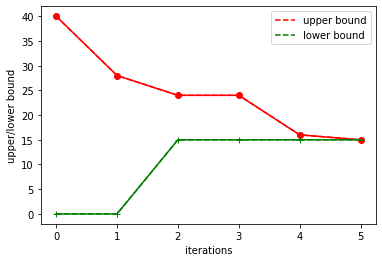

In [9]:
import matplotlib.pyplot as plt

ubs = []
lbs = []
x = []

for i in range(len(optimal_history)):
  x.append(i)
  lbs.append(optimal_history[i][0])
  ubs.append(optimal_history[i][1])

l1=plt.plot(x,ubs,'r--',label='upper bound')
l2=plt.plot(x,lbs,'g--',label='lower bound')
plt.plot(x,ubs,'ro-',x,lbs,'g+-')
plt.xlabel('iterations')
plt.ylabel('upper/lower bound')
plt.legend()
plt.show()


The following figure shows the convergence of the cardinality bounds.

![](https://drive.google.com/uc?export=view&id=1QY5XOYrMn_8fIUjl1pswuYUNKDwAX1RW)